# Stichted Data bottle

## Kelp vs. Squid Ink

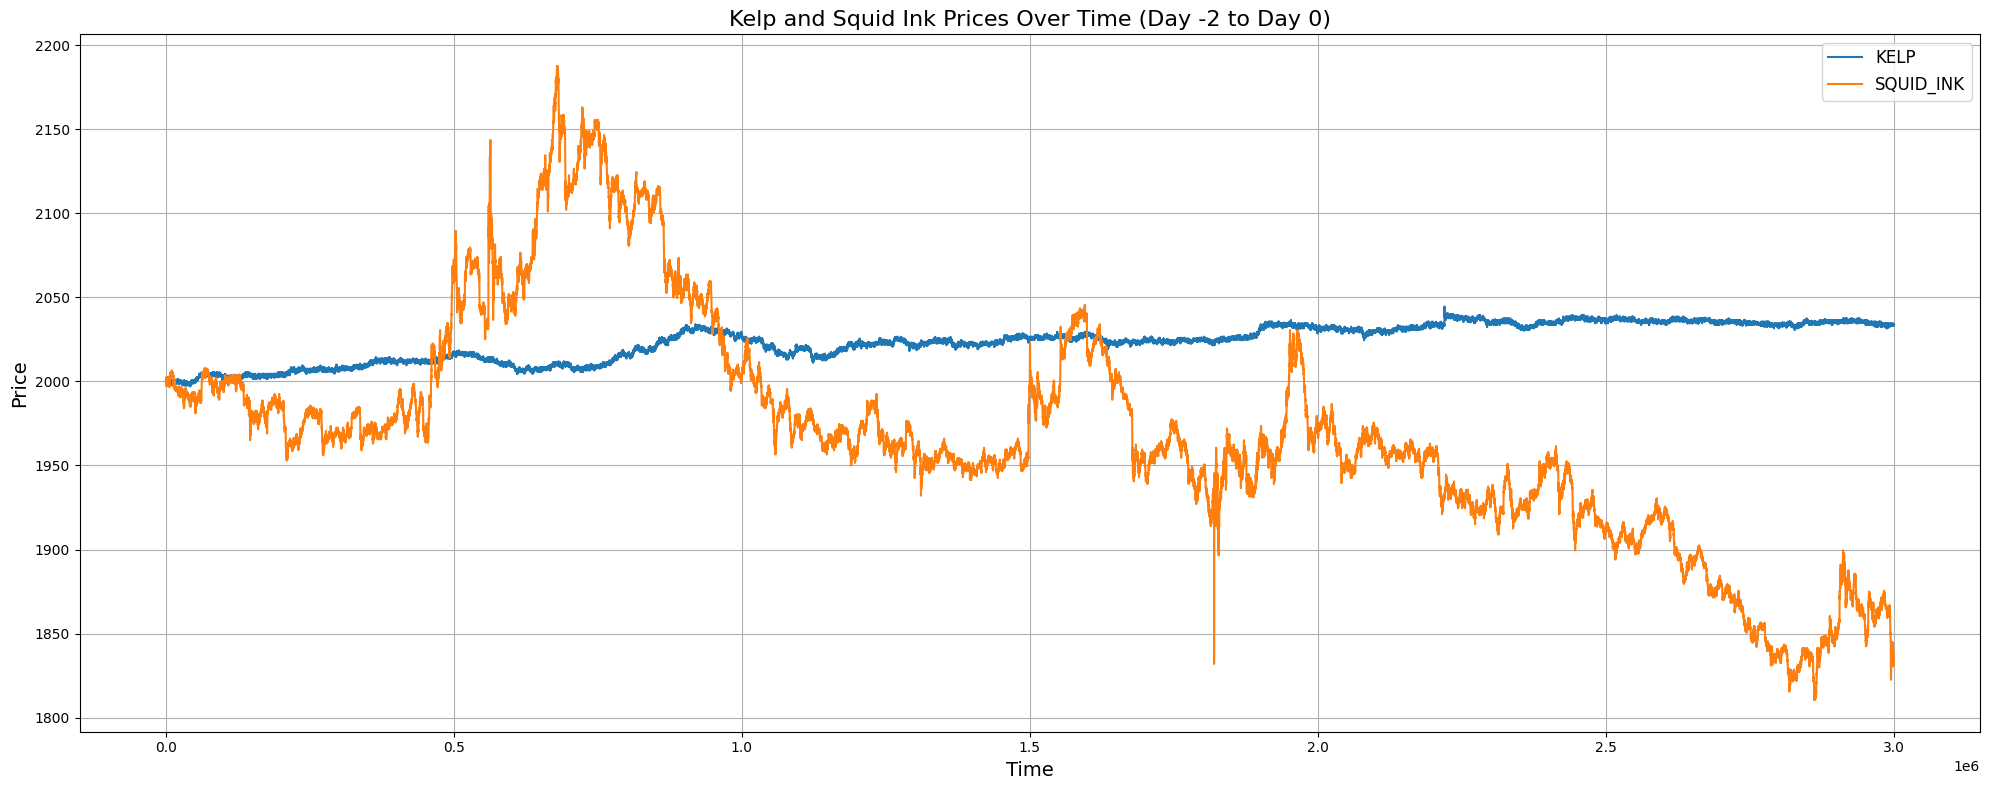

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs with proper delimiter
day_minus_2 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_-2.csv", delimiter=';')
day_minus_1 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_-1.csv", delimiter=';')
day_0 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_0.csv", delimiter=';')

# Combine all data
all_days = pd.concat([day_minus_2, day_minus_1, day_0], ignore_index=True)

# Compute absolute time
all_days["day"] = all_days["day"].astype(int)
all_days["timestamp"] = all_days["timestamp"].astype(int)
all_days["absolute_time"] = all_days["timestamp"] + (all_days["day"] + 2) * 1_000_000

# Pivot so each product has its own line
pivot_df = all_days.pivot(index="absolute_time", columns="product", values="mid_price")

# Plot only Kelp and Squid Ink
plt.figure(figsize=(20, 8))
for product in ["KELP", "SQUID_INK"]:
    plt.plot(pivot_df.index, pivot_df[product], label=product)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Kelp and Squid Ink Prices Over Time (Day -2 to Day 0)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
